In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#將壓縮檔複製到/content
! cp  "/content/drive/My Drive/flower/flower_0611_InceptionV3epoch20_numtraindata50.h5" /content/

In [3]:
#將壓縮檔複製到/content
! cp  "/content/drive/My Drive/flower/training.zip" /content/

In [4]:
#解壓縮訓練集
! unzip /content/training -d /content/training/ > data_unzip.log

In [5]:
import shutil
shutil.move("/content/training/label.csv", "/content")

'/content/label.csv'

In [6]:
#read csv
import pandas as pd
flower_data = pd.read_csv('/content/label.csv')

In [7]:
label = []
for i in range(219):
  #請輸入程式碼
  temp = flower_data[flower_data['category'] == i]
  label.append(temp.reset_index())
  #print('第' + str(i) + '類張數: ' + str(len(label[i])))
label[0]

,index,filename,category
0,0,me3uqlixjn.jpg,0
1,1,5c0vsrdtpq.jpg,0
2,2,swixut5b3l.jpg,0
3,3,m0eqa926lo.jpg,0
4,4,5jr6x2y9p8.jpg,0
5,5,9y7sv8xqc2.jpg,0
6,6,nzt9hr5se2.jpg,0
7,7,niky1zwp74.jpg,0
8,8,3jdlrqgcz4.jpg,0
9,9,m4dtjfyu0w.jpg,0


In [8]:
###生成很多照片###
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import shutil
import random
from PIL import Image
from PIL import ImageEnhance
%matplotlib inline

In [9]:
test_images = []
test_label = []

for i in range(219):
  images_temp = []
  label_temp = [i] * 5
  for j in range(5):
    img = cv2.imread('/content/training/'+label[i]['filename'][j])
    images_temp.append(cv2.resize(img,(160,160), cv2.INTER_AREA))
  test_images += images_temp
  test_label += label_temp

In [10]:
import numpy as np
x_test = np.array(test_images)
y_test = np.array(test_label)
x_test_norm = x_test.astype('float32')/255

In [11]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/flower/flower_0611_InceptionV3epoch20_numtraindata50.h5')
print('載入模型成功')

載入模型成功


In [12]:
predict_prop = model.predict(x_test_norm)
print(np.argmax(predict_prop[102]))

20


預測圖片


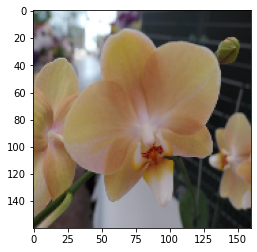

實際類別圖片


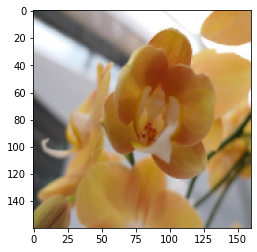

In [13]:
import matplotlib.pyplot as plt

print('預測圖片')
image = cv2.cvtColor(test_images[102], cv2.COLOR_BGR2RGB)
test_img = np.array(image)
plt.imshow(test_img)

plt.show()
print('實際類別圖片')
img = cv2.imread('/content/training/'+label[20]['filename'][7])
img = cv2.resize(img,(160,160), cv2.INTER_AREA)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(image)
plt.imshow(img)
plt.show()